# **07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación**

## **Estrategia 2: Red pre-entrenada**

### **1. Carga y acondicionamiento del conjunto de datos**
Dataset: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

#### *1.1. Descarga del dataset desde la plataforma kaggle*

In [1]:
#Cargamos el fichero de autenticación de kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
#Descargamos el dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

 99% 528M/534M [00:06<00:00, 60.1MB/s]
100% 534M/534M [00:06<00:00, 81.0MB/s]


In [ ]:
#Descomprimimos el dataset
!unzip vegetable-image-dataset.zip

#### *1.2 Carga del dataset y acondicionamiento de datos*
1. Utilizamos el generador para mayor eficiencia en la carga de datos
2. Utilizamos el parametro class_mode='categorical' para realizar One-hot encoding
3. Con el parámetro rescale=1./255 normalizamos para disminuir el coste computacional


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir los directorios de los conjuntos de datos
train_dir = 'Vegetable Images/train'
test_dir = 'Vegetable Images/test'
val_dir = 'Vegetable Images/validation'

# Definir el tamaño de imagen que se utilizará para el modelo
img_size = (224, 224)

# Definir el generador de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical')

# Definir el generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical')

# Definir el generador de datos para el conjunto de validación
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical')

# Obtener los datos y las etiquetas de los generadores de datos
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()
x_val, y_val = val_generator.next()


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


### **2. Inspección del conjunto de datos**

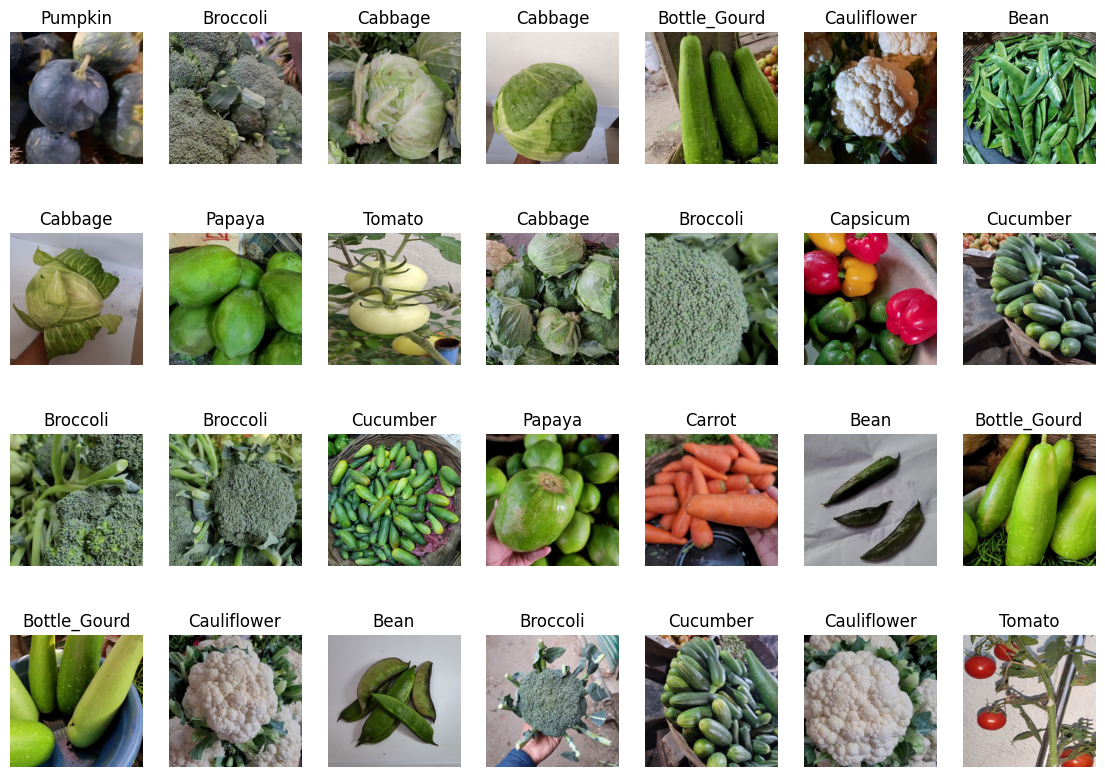

In [13]:
import matplotlib.pyplot as plt

# Obtener la lista de nombres de las clases
class_names = list(train_generator.class_indices.keys())

fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.axis('off')
    # Agregar el título de la clase correspondiente
    label_index = y_train[n].argmax()
    plt.title(class_names[label_index])
plt.show()


### **3. Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución**

### **4. Monitorización del proceso de entrenamiento para la toma de decisiones**

### **5. Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental**